## **Import Libraries**

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.api import VAR
from scipy.stats import chi2
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.vector_ar.svar_model import SVAR
!pip3 install arch
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1_7sBSF8J50c5u3BN84W8Q8DON0KJBjGNIZ9dksrjNjU/export?format=csv&gid=0'
Data = pd.read_csv(url)
Data['Date'] = pd.to_datetime(Data['Date'])
Data.set_index('Date', inplace=True)

## **Plot and Time period selection**

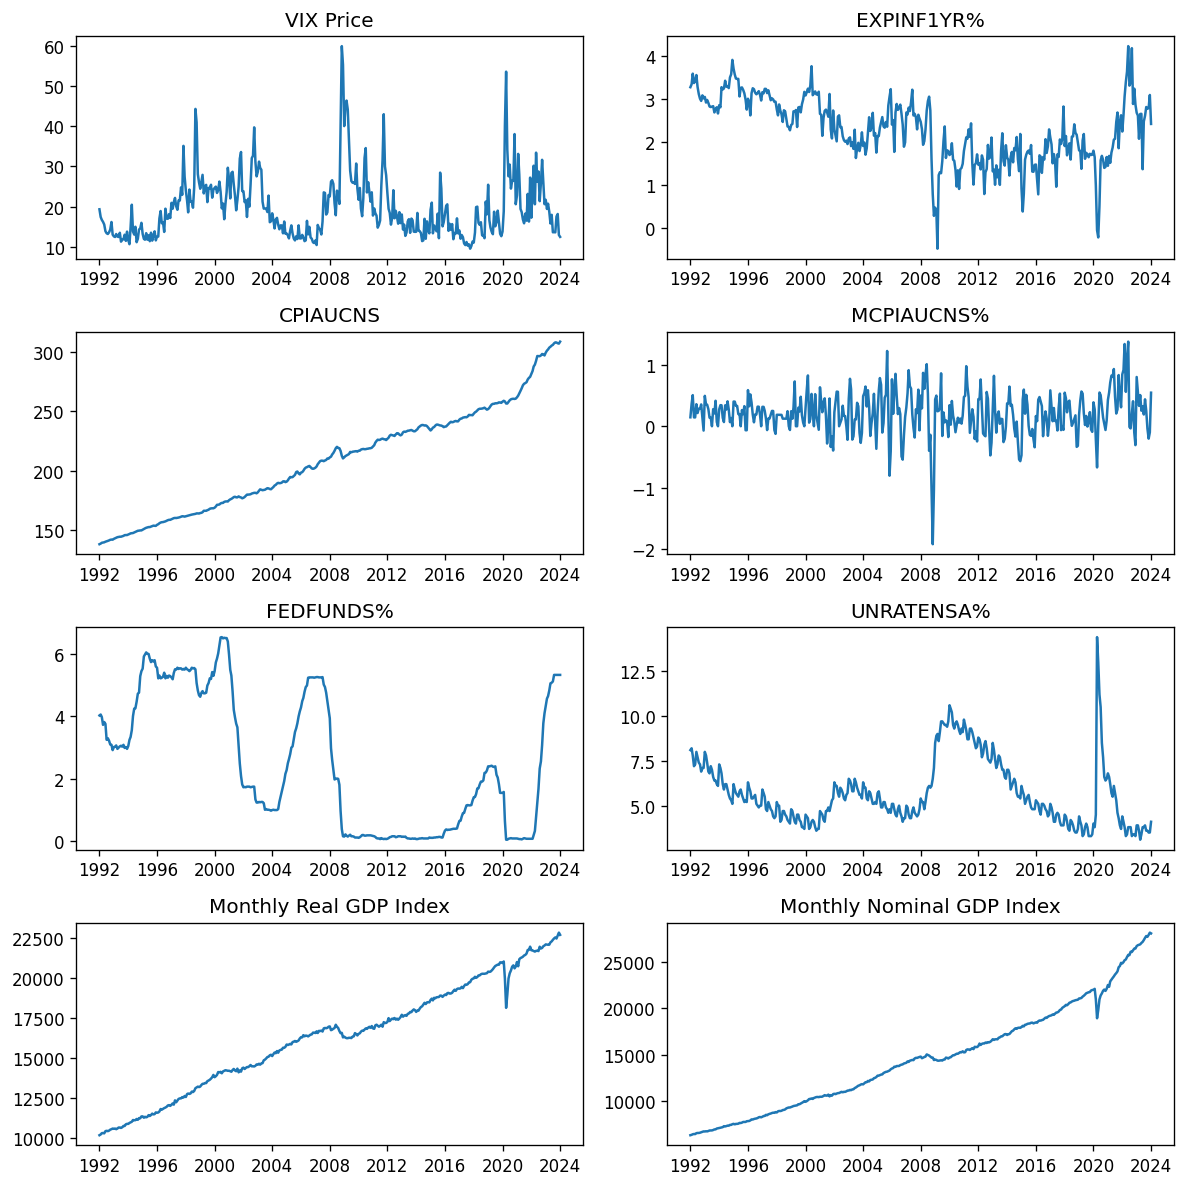

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10, 10))
axes_flat = axes.flatten()
for col, ax in zip(Data.columns, axes_flat):
  ax.plot(Data.index, Data[col])
  ax.set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
df = Data['1999-12-01':'2024-01-01']
print(df)

            VIX Price  EXPINF1YR%  CPIAUCNS  MCPIAUCNS%  FEDFUNDS%  \
Date                                                                 
1999-12-01      24.18    3.164020   168.300    0.000000       5.30   
2000-01-01      24.64    3.080288   168.800    0.297088       5.45   
2000-02-01      24.95    3.157068   169.800    0.592417       5.73   
2000-03-01      23.37    3.238857   171.200    0.824499       5.85   
2000-04-01      24.11    3.160674   171.300    0.058411       6.02   
...               ...         ...       ...         ...        ...   
2023-09-01      13.57    2.812435   307.789    0.248513       5.33   
2023-10-01      17.52    2.769574   307.671   -0.038338       5.33   
2023-11-01      18.14    2.791196   307.051   -0.201514       5.33   
2023-12-01      12.92    3.091665   306.746   -0.099332       5.33   
2024-01-01      12.45    2.418633   308.417    0.544750       5.33   

            UNRATENSA%  Monthly Real GDP Index  Monthly Nominal GDP Index  
Date         

## **Stationarity**

In [ ]:
#Stationarity Test VIX (ADF)
adf1 = ADF(df['VIX Price'])
print(adf1.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.572
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
adf2 = ADF(df['MCPIAUCNS%'])
print(adf2.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.331
P-value                         0.014
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
adf3 = ADF(df['EXPINF1YR%'])
print(adf2.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.331
P-value                         0.014
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
adf4 = ADF(df['FEDFUNDS%'])
print(adf4.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.668
P-value                         0.005
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
adf5 = ADF(df['UNRATENSA%'])
print(adf5.summary().as_text())

df['UnemoloymentRate_first_diff'] = df[['UNRATENSA%']].diff()
filter1 = df[df['UnemoloymentRate_first_diff'].notna()]
adf6 = ADF(filter1['UnemoloymentRate_first_diff'])
print(adf6.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.361
P-value                         0.153
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                -10.851
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


<ipython-input-35-aa84048bf3b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnemoloymentRate_first_diff'] = df[['UNRATENSA%']].diff()


In [ ]:
adf7 = ADF(df['Monthly Real GDP Index'])
print(adf7.summary().as_text())

df['rgdp_growthrate'] = df[['Monthly Real GDP Index']].pct_change()
filter2 = df[df['rgdp_growthrate'].notna()]
adf8 = ADF(filter2['rgdp_growthrate'])
print(adf8.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  0.592
P-value                         0.987
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


<ipython-input-36-dd4dbb533cdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rgdp_growthrate'] = df[['Monthly Real GDP Index']].pct_change()


   Augmented Dickey-Fuller Results   
Test Statistic                -10.088
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
df = df['2000-01-01':]

## **Previous VAR 1 (No Dummy + 1/1/2000 - 6/1/2023)**

In [ ]:
test_df1 = df[['VIX Price','MCPIAUCNS%','FEDFUNDS%','UnemoloymentRate_first_diff','rgdp_growthrate']]
nobs = 7
test_train, test_test = test_df1[0:-nobs], test_df1[-nobs:]
print(test_train)

            VIX Price  MCPIAUCNS%  FEDFUNDS%  UnemoloymentRate_first_diff  \
Date                                                                        
2000-01-01      24.64    0.297088       5.45                          0.8   
2000-02-01      24.95    0.592417       5.73                         -0.1   
2000-03-01      23.37    0.824499       5.85                         -0.1   
2000-04-01      24.11    0.058411       6.02                         -0.6   
2000-05-01      26.20    0.116754       6.27                          0.1   
...               ...         ...        ...                          ...   
2023-02-01      19.40    0.558211       4.57                          0.0   
2023-03-01      20.70    0.331073       4.65                         -0.3   
2023-04-01      18.70    0.505904       4.83                         -0.5   
2023-05-01      15.78    0.251843       5.06                          0.3   
2023-06-01      17.94    0.322891       5.08                          0.4   

In [ ]:
endog = test_train[['MCPIAUCNS%','VIX Price' ]]
exog = test_train[['FEDFUNDS%','UnemoloymentRate_first_diff','rgdp_growthrate']]

def fit_var_model(end,ex, maxlags):
    """
    Fit a VAR model for each lag length up to maxlags and calculate AIC and the LR test statistic.
    """
    results = []
    for lags in range(1, maxlags + 1):
        model = VAR(end,ex)
        result = model.fit(lags)
        results.append(result)
    return results

def likelihood_ratio_test(results):
    """
    Perform the Likelihood Ratio test and determine the optimal number of lags.
    """
    lr_tests = []
    for i in range(1, len(results)):
        lr_stat = -2 * (results[i-1].llf - results[i].llf)
        lr_dof = results[i].k_ar - results[i-1].k_ar
        lr_pvalue = chi2.sf(lr_stat, df=lr_dof)
        lr_tests.append((lr_stat, lr_pvalue, i+1))  # i+1 represents the number of lags
    return lr_tests

def find_optimal_lags(end,ex, maxlags):
    """
    Find the optimal number of lags for a VAR model based on the LR test.
    """
    results = fit_var_model(end,ex, maxlags)
    lr_tests = likelihood_ratio_test(results)
    print(lr_tests)

    # Find the lag with the lowest p-value that is still significant (e.g., < 0.05)
    optimal_lags = None
    for stat, pvalue, lags in sorted(lr_tests, key=lambda x: x[1]):
        if pvalue < 0.05:
            optimal_lags = lags
            break
    return optimal_lags, lr_tests

optimal_lags, lr_tests = find_optimal_lags(endog,exog, maxlags=10)
print("Optimal number of lags:", optimal_lags)
for test in lr_tests:
  print(f"Lags: {test[2]}, LR Statistic: {test[0]:.2f}, p-value: {test[1]:.4f}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

[(26.5944515788251, 2.509634463944919e-07, 2), (16.308039280969524, 5.383507174310708e-05, 3), (16.772050695191638, 4.214957430501348e-05, 4), (11.276726352359447, 0.0007848483469531378, 5), (6.242452574823801, 0.012472364064940945, 6), (18.29305347554873, 1.8939654014862862e-05, 7), (10.1694521355073, 0.0014278669828877205, 8), (7.267758896648957, 0.007020334631607594, 9), (24.780746946207273, 6.423589275998836e-07, 10)]
Optimal number of lags: 2
Lags: 2, LR Statistic: 26.59, p-value: 0.0000
Lags: 3, LR Statistic: 16.31, p-value: 0.0001
Lags: 4, LR Statistic: 16.77, p-value: 0.0000
Lags: 5, LR Statistic: 11.28, p-value: 0.0008
Lags: 6, LR Statistic: 6.24, p-value: 0.0125
Lags: 7, LR Statistic: 18.29, p-value: 0.0000
Lags: 8, LR Statistic: 10.17, p-value: 0.0014
Lags: 9, LR Statistic: 7.27, p-value: 0.0070
Lags: 10, LR Statistic: 24.78, p-value: 0.0000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
#VAR Model 1
model1 = VAR(endog, exog)
model1_fit = model1.fit(2)
model1_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Apr, 2024
Time:                     18:40:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.03354
Nobs:                     280.000    HQIC:                  0.909152
Log likelihood:          -894.224    FPE:                    2.28388
AIC:                     0.825843    Det(Omega_mle):         2.15876
--------------------------------------------------------------------
Results for equation MCPIAUCNS%
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                               0.069078         0.064881            1.065           0.287
FEDFUNDS%                           0.009238         0.010663            0.866           0.386

In [ ]:
#Stability Test
if model1_fit.is_stable():
    print("The model is stable.")
else:
    print("The model is not stable.")

The model is stable.


In [ ]:
#Granger Causality Test
causality_results = model1_fit.test_causality(caused='VIX Price', causing=['MCPIAUCNS%'], kind='f', signif=0.05)
print(causality_results.summary())
causality_results = model1_fit.test_causality(caused='MCPIAUCNS%', causing=['VIX Price'], kind='f', signif=0.05)
print(causality_results.summary())

Granger causality F-test. H_0: MCPIAUCNS% does not Granger-cause VIX Price. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.8341          3.012   0.435 (2, 544)
----------------------------------------------
Granger causality F-test. H_0: VIX Price does not Granger-cause MCPIAUCNS%. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.4261          3.012   0.653 (2, 544)
----------------------------------------------


In [ ]:
#Whiteness of Residuals
whiteness_results=model1_fit.test_whiteness()
print(whiteness_results)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 56.800, critical value: 46.194>, p-value: 0.004>


In [ ]:
#Normality
normality_results=model1_fit.test_normality()
print(normality_results)

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: reject at 5% significance level. Test statistic: 139.309, critical value: 9.488>, p-value: 0.000>


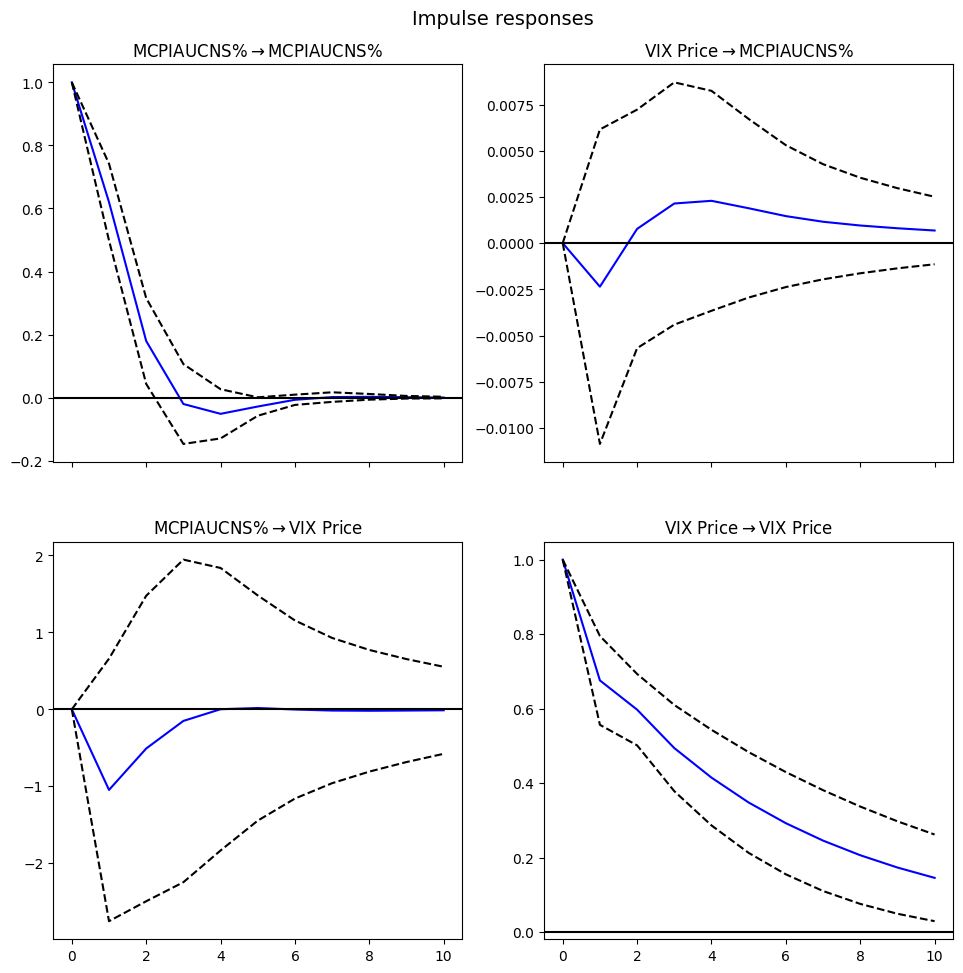

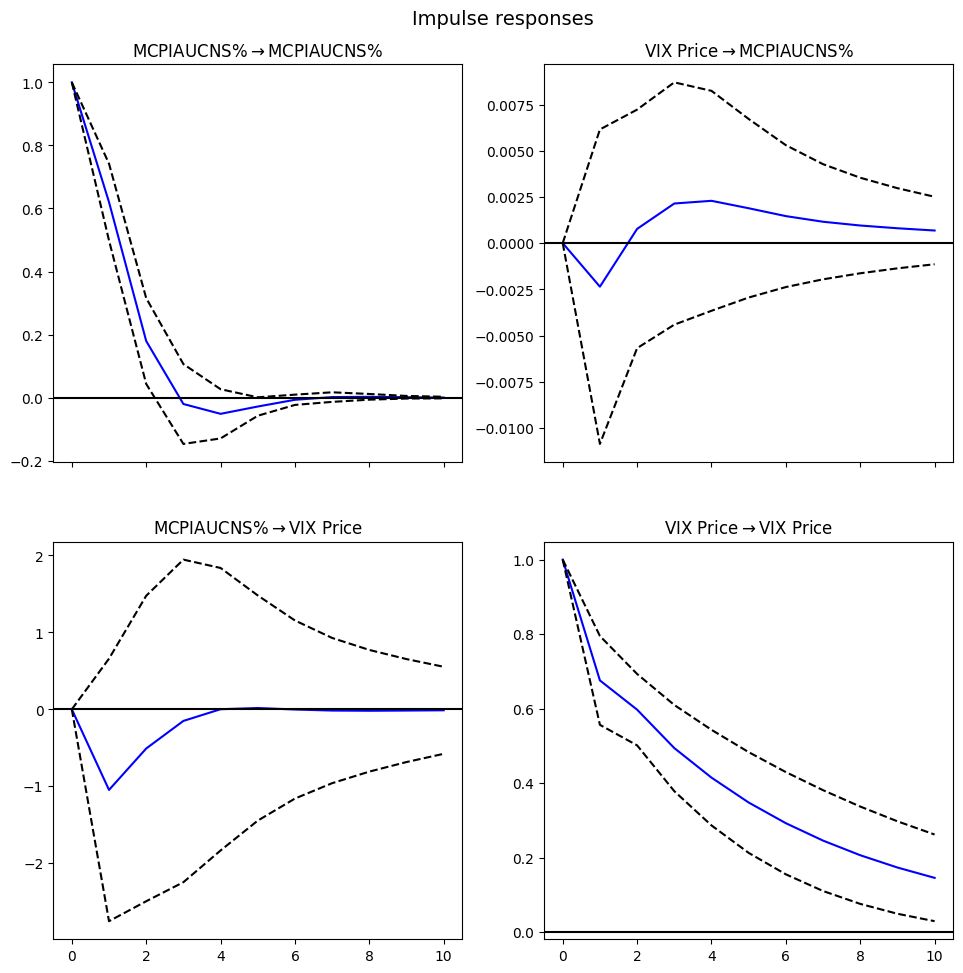

In [ ]:
#Impulse response functions (Reduced Form)
irf = model1_fit.irf(10)  # Get IRF for 10 periods
irf.plot()

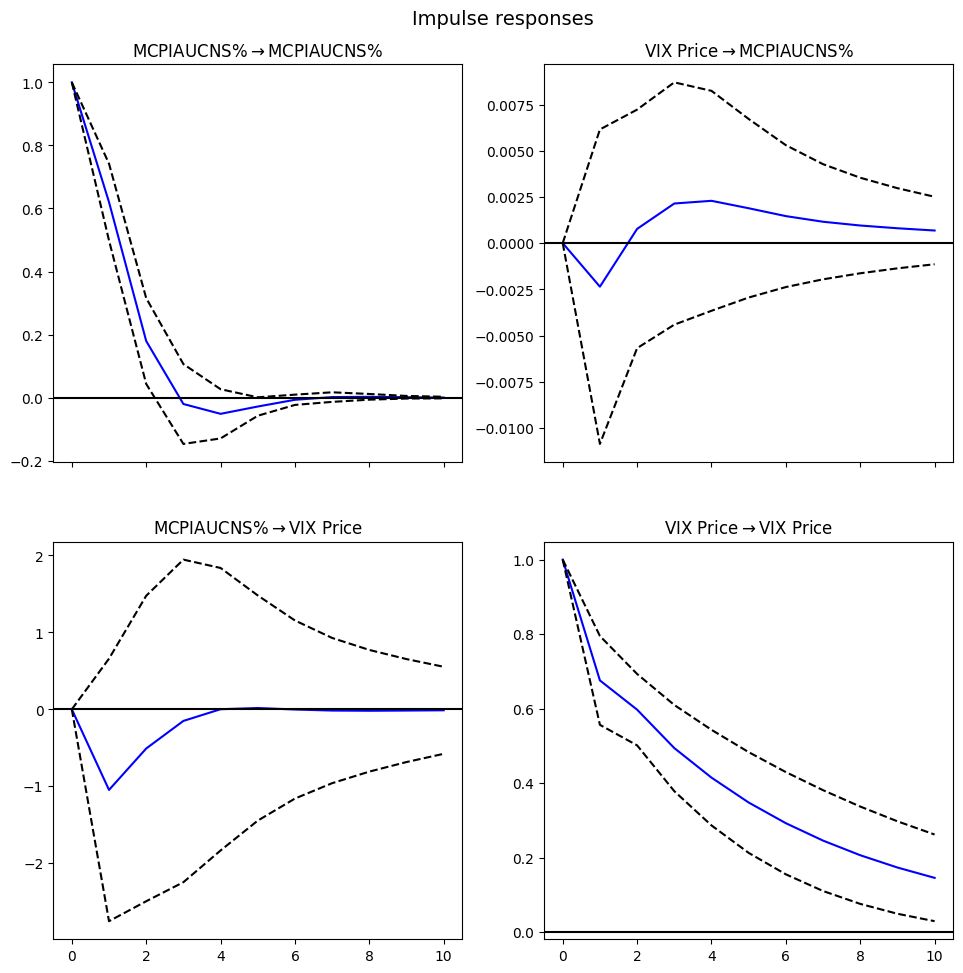

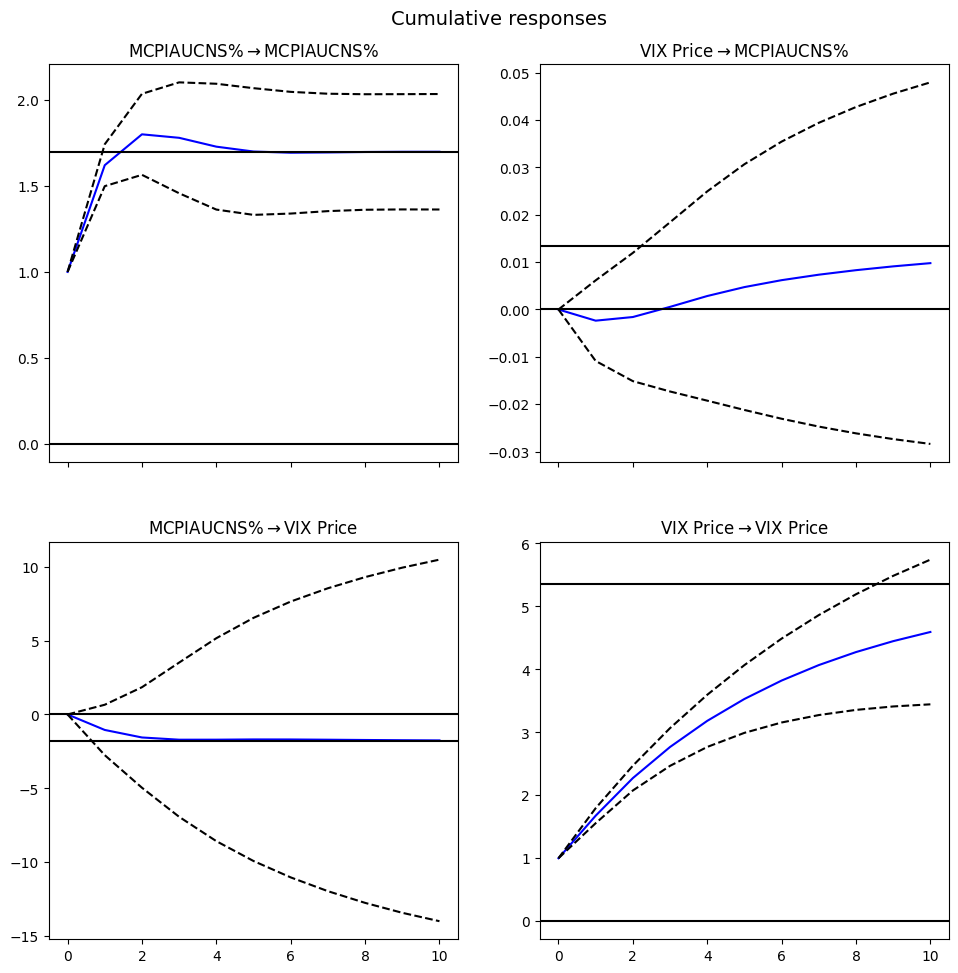

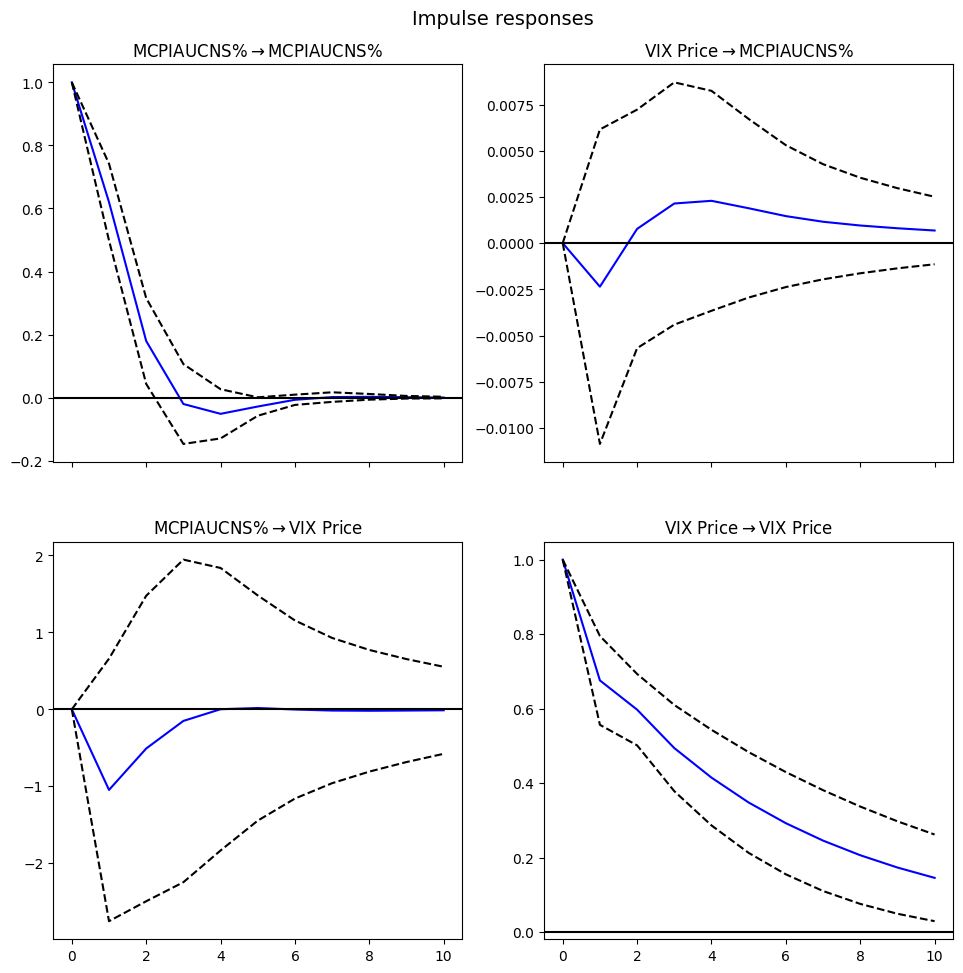

In [ ]:
#Cummulative Impulse response functions (Reduced Form)
irf.plot_cum_effects(orth=False)
irf.plot()

In [ ]:
in_sample_predictions1 = model1_fit.fittedvalues
test_train['MCPIAUCNS% forecast'] = in_sample_predictions1['MCPIAUCNS%']
test_train['VIX Price forecast'] = in_sample_predictions1['VIX Price']
print(test_train)

            VIX Price  MCPIAUCNS%  FEDFUNDS%  UnemoloymentRate_first_diff  \
Date                                                                        
2000-01-01      24.64    0.297088       5.45                          0.8   
2000-02-01      24.95    0.592417       5.73                         -0.1   
2000-03-01      23.37    0.824499       5.85                         -0.1   
2000-04-01      24.11    0.058411       6.02                         -0.6   
2000-05-01      26.20    0.116754       6.27                          0.1   
...               ...         ...        ...                          ...   
2023-02-01      19.40    0.558211       4.57                          0.0   
2023-03-01      20.70    0.331073       4.65                         -0.3   
2023-04-01      18.70    0.505904       4.83                         -0.5   
2023-05-01      15.78    0.251843       5.06                          0.3   
2023-06-01      17.94    0.322891       5.08                          0.4   

<ipython-input-47-8ea9a264de1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_train['MCPIAUCNS% forecast'] = in_sample_predictions1['MCPIAUCNS%']
<ipython-input-47-8ea9a264de1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_train['VIX Price forecast'] = in_sample_predictions1['VIX Price']


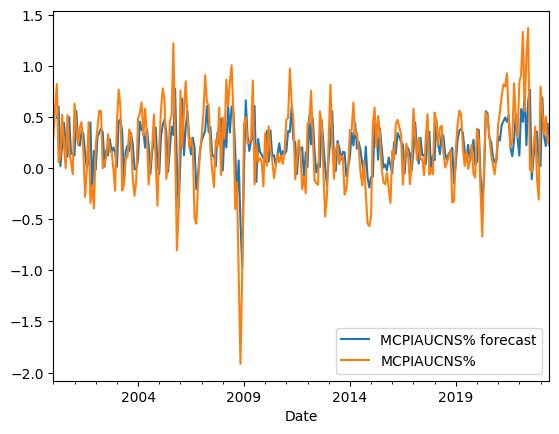

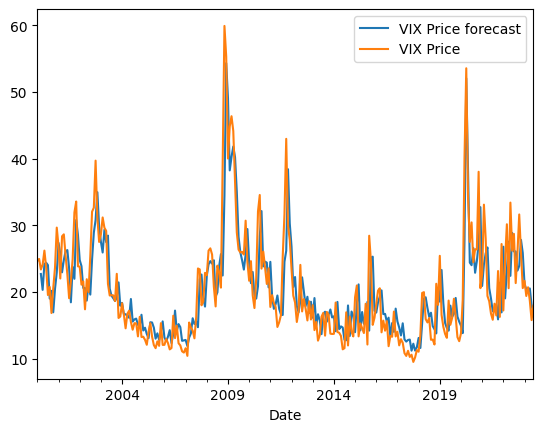

RMSE (inflation): 0.3234282678174543
RMSE (VIX): 4.53180791867168


In [ ]:
test_train[['MCPIAUCNS% forecast','MCPIAUCNS%']].plot()
pyplot.show()
test_train[['VIX Price forecast','VIX Price']].plot()
pyplot.show()
test_train = test_train.dropna()
mse1_IS_inflation = mean_squared_error(test_train['MCPIAUCNS%'], test_train['MCPIAUCNS% forecast'])
rmse1_IS_inflation = sqrt(mse1_IS_inflation)
print("RMSE (inflation):", rmse1_IS_inflation)

mse1_IS_VIX = mean_squared_error(test_train['VIX Price'], test_train['VIX Price forecast'])
rmse1_IS_VIX = sqrt(mse1_IS_VIX)
print("RMSE (VIX):", rmse1_IS_VIX)

<ipython-input-49-4a56cac04589>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_test['MCPIAUCNS% forecast'] = forecast[:, 0]
<ipython-input-49-4a56cac04589>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_test['VIX Price forecast'] = forecast[:, 1]


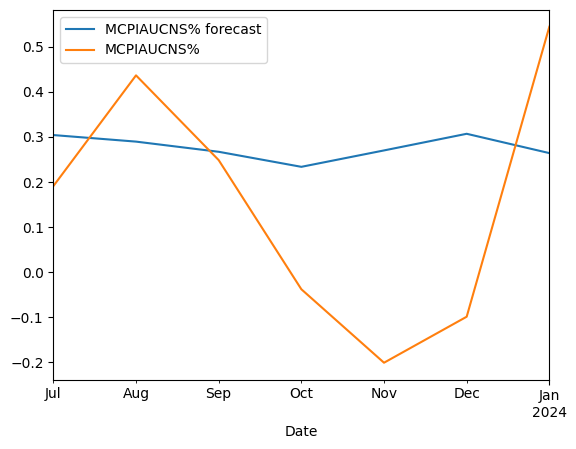

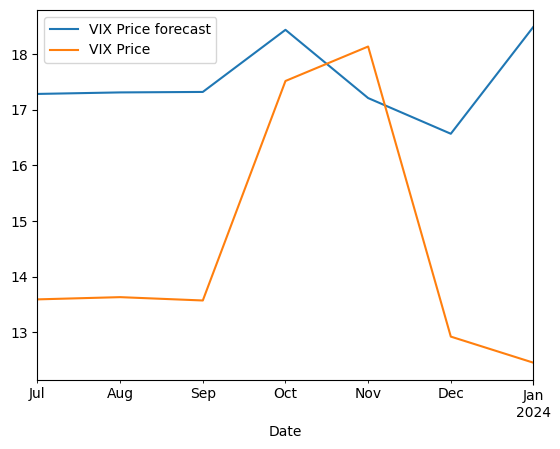

RMSE (inflation): 0.2865995054390681
RMSE (VIX): 3.6432405373126593


In [ ]:
exog_future1 = test_test[['FEDFUNDS%','UnemoloymentRate_first_diff','rgdp_growthrate']]
lag_order = model1_fit.k_ar
forecast=np.array(model1_fit.forecast(endog.values[-lag_order:],steps=7,exog_future=exog_future1))
test_test['MCPIAUCNS% forecast'] = forecast[:, 0]
test_test['VIX Price forecast'] = forecast[:, 1]

test_test[['MCPIAUCNS% forecast','MCPIAUCNS%']].plot()
pyplot.show()

test_test[['VIX Price forecast','VIX Price']].plot()
pyplot.show()

mse1_OOS_inflation = mean_squared_error(test_test['MCPIAUCNS%'], test_test['MCPIAUCNS% forecast'])
rmse1_OOS_inflation = sqrt(mse1_OOS_inflation)

mse1_OOS_VIX = mean_squared_error(test_test['VIX Price'], test_test['VIX Price forecast'])
rmse1_OOS_VIX = sqrt(mse1_OOS_VIX)

print("RMSE (inflation):", rmse1_OOS_inflation)
print("RMSE (VIX):", rmse1_OOS_VIX)

## **VAR 2 (Dummy + 1/1/2000 - 6/1/2023)**

In [100]:
test_df2 = df[['VIX Price','MCPIAUCNS%','FEDFUNDS%','UnemoloymentRate_first_diff','rgdp_growthrate']]

recession1_start = '2001-03-01'  # Start date of Event 1
recession1_end = '2001-11-02'    # End date of Event 1

recession2_start = '2007-12-01'  # Start date of Event 1
recession2_end = '2009-06-02'    # End date of Event 1

recession3_start = '2020-02-01'  # Start date of Event 2
recession3_end = '2020-04-02'    # End date of Event 2

test_df2['recession1'] = 0
test_df2.loc[recession1_start:recession1_end, 'recession1'] = 1

test_df2['recession2'] = 0
test_df2.loc[recession2_start:recession2_end, 'recession2'] = 1

test_df2['recession3'] = 0
test_df2.loc[recession3_start:recession3_end, 'recession3'] = 1

<ipython-input-100-8a286001763a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df2['recession1'] = 0
<ipython-input-100-8a286001763a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df2['recession2'] = 0
<ipython-input-100-8a286001763a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [101]:
test2_train, test2_test = test_df2[0:-nobs], test_df2[-nobs:]

In [ ]:
endog2 = test2_train[['MCPIAUCNS%','VIX Price' ]]
exog2 = test2_train[['FEDFUNDS%','UnemoloymentRate_first_diff',\
                     'rgdp_growthrate','recession1','recession2','recession3']]

model2 = VAR(endog2, exog2)
for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model2.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
y = model2.select_order(maxlags=12)
y.summary()

In [ ]:
optimal_lags, lr_tests = find_optimal_lags(endog2,exog2, maxlags=12)
print("Optimal number of lags:", optimal_lags)
for test in lr_tests:
  print(f"Lags: {test[2]}, LR Statistic: {test[0]:.2f}, p-value: {test[1]:.4f}")

In [ ]:
model2_fit = model2.fit(2)
model2_fit.summary()

In [105]:
#Stability Test
if model2_fit.is_stable():
    print("The model is stable.")
else:
    print("The model is not stable.")

#Granger Causality Test
causality_results = model2_fit.test_causality(caused='VIX Price', causing=['MCPIAUCNS%'], kind='f', signif=0.05)
print(causality_results.summary())
causality_results = model2_fit.test_causality(caused='MCPIAUCNS%', causing=['VIX Price'], kind='f', signif=0.05)
print(causality_results.summary())

The model is stable.
Granger causality F-test. H_0: MCPIAUCNS% does not Granger-cause VIX Price. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.9594          3.012   0.384 (2, 538)
----------------------------------------------
Granger causality F-test. H_0: VIX Price does not Granger-cause MCPIAUCNS%. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.6615          3.012   0.517 (2, 538)
----------------------------------------------


In [106]:
in_sample_predictions2 = model2_fit.fittedvalues
test2_train['MCPIAUCNS% forecast'] = in_sample_predictions2['MCPIAUCNS%']
test2_train['VIX Price forecast'] = in_sample_predictions2['VIX Price']
print(test2_train)

            VIX Price  MCPIAUCNS%  FEDFUNDS%  UnemoloymentRate_first_diff  \
Date                                                                        
2000-01-01      24.64    0.297088       5.45                          0.8   
2000-02-01      24.95    0.592417       5.73                         -0.1   
2000-03-01      23.37    0.824499       5.85                         -0.1   
2000-04-01      24.11    0.058411       6.02                         -0.6   
2000-05-01      26.20    0.116754       6.27                          0.1   
...               ...         ...        ...                          ...   
2023-02-01      19.40    0.558211       4.57                          0.0   
2023-03-01      20.70    0.331073       4.65                         -0.3   
2023-04-01      18.70    0.505904       4.83                         -0.5   
2023-05-01      15.78    0.251843       5.06                          0.3   
2023-06-01      17.94    0.322891       5.08                          0.4   

<ipython-input-106-09a4e34f5588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2_train['MCPIAUCNS% forecast'] = in_sample_predictions2['MCPIAUCNS%']
<ipython-input-106-09a4e34f5588>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2_train['VIX Price forecast'] = in_sample_predictions2['VIX Price']


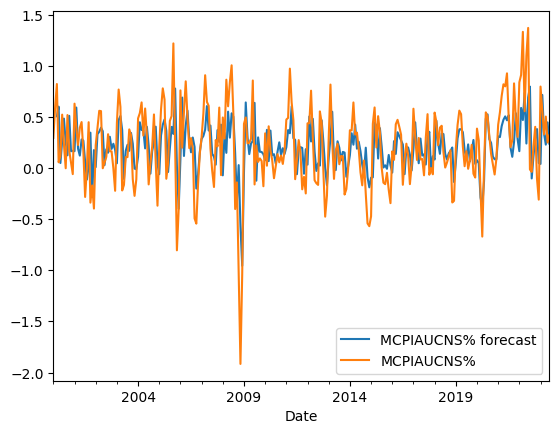

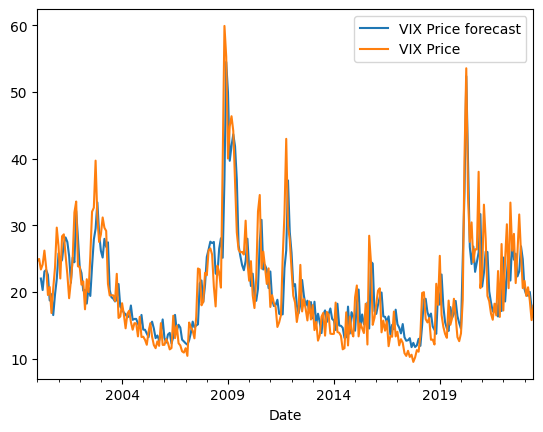

In [107]:
test2_train[['MCPIAUCNS% forecast','MCPIAUCNS%']].plot()
pyplot.show()
test2_train[['VIX Price forecast','VIX Price']].plot()
pyplot.show()

In [108]:
test2_train = test2_train.dropna()
mse2_IS_inflation = mean_squared_error(test2_train['MCPIAUCNS%'], test2_train['MCPIAUCNS% forecast'])
rmse2_IS_inflation = sqrt(mse2_IS_inflation)
print("RMSE (inflation):", rmse2_IS_inflation)

mse2_IS_VIX = mean_squared_error(test2_train['VIX Price'], test2_train['VIX Price forecast'])
rmse2_IS_VIX = sqrt(mse2_IS_VIX)
print("RMSE (VIX):", rmse2_IS_VIX)

RMSE (inflation): 0.3216591713874584
RMSE (VIX): 4.363980091572481


In [109]:
n_forecast2 = len(test2_test)
lag_order2 = model2_fit.k_ar
exog_future2 = test2_test[['FEDFUNDS%', 'UnemoloymentRate_first_diff', 'rgdp_growthrate','recession1','recession2','recession3']]
out_of_sample_forecasts2 = model2_fit.forecast(y=endog2.values[-lag_order2:], steps=n_forecast2,exog_future = exog_future2)
test2_test['MCPIAUCNS% forecast'] = out_of_sample_forecasts2[:, 0]
test2_test['VIX Price forecast'] = out_of_sample_forecasts2[:, 1]
print(test2_test)

            VIX Price  MCPIAUCNS%  FEDFUNDS%  UnemoloymentRate_first_diff  \
Date                                                                        
2023-07-01      13.59    0.190751       5.12                          0.0   
2023-08-01      13.63    0.436715       5.33                          0.1   
2023-09-01      13.57    0.248513       5.33                         -0.3   
2023-10-01      17.52   -0.038338       5.33                          0.0   
2023-11-01      18.14   -0.201514       5.33                         -0.1   
2023-12-01      12.92   -0.099332       5.33                          0.0   
2024-01-01      12.45    0.544750       5.33                          0.6   

            rgdp_growthrate  recession1  recession2  recession3  \
Date                                                              
2023-07-01         0.004338           0           0           0   
2023-08-01         0.003845           0           0           0   
2023-09-01         0.002922           

<ipython-input-109-6fa28d1d6010>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2_test['MCPIAUCNS% forecast'] = out_of_sample_forecasts2[:, 0]
<ipython-input-109-6fa28d1d6010>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2_test['VIX Price forecast'] = out_of_sample_forecasts2[:, 1]


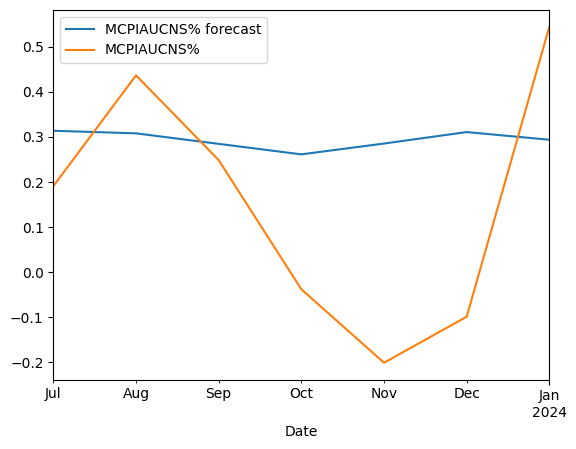

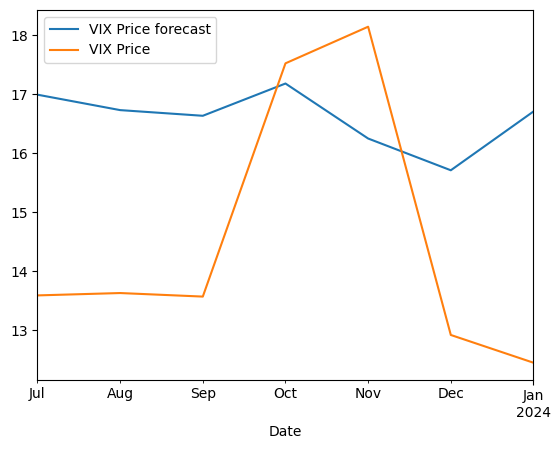

In [110]:
test2_test[['MCPIAUCNS% forecast','MCPIAUCNS%']].plot()
pyplot.show()
test2_test[['VIX Price forecast','VIX Price']].plot()
pyplot.show()

In [111]:
mse2_OOS_inflation = mean_squared_error(test2_test['MCPIAUCNS%'], test2_test['MCPIAUCNS% forecast'])
rmse2_OOS_inflation = sqrt(mse2_OOS_inflation)
print("RMSE (inflation):", rmse2_OOS_inflation)

mse2_OOS_VIX = mean_squared_error(test2_test['VIX Price'], test2_test['VIX Price forecast'])
rmse2_OOS_VIX = sqrt(mse2_OOS_VIX)
print("RMSE (VIX):", rmse2_OOS_VIX)

RMSE (inflation): 0.29055445402628305
RMSE (VIX): 2.9303409610017197


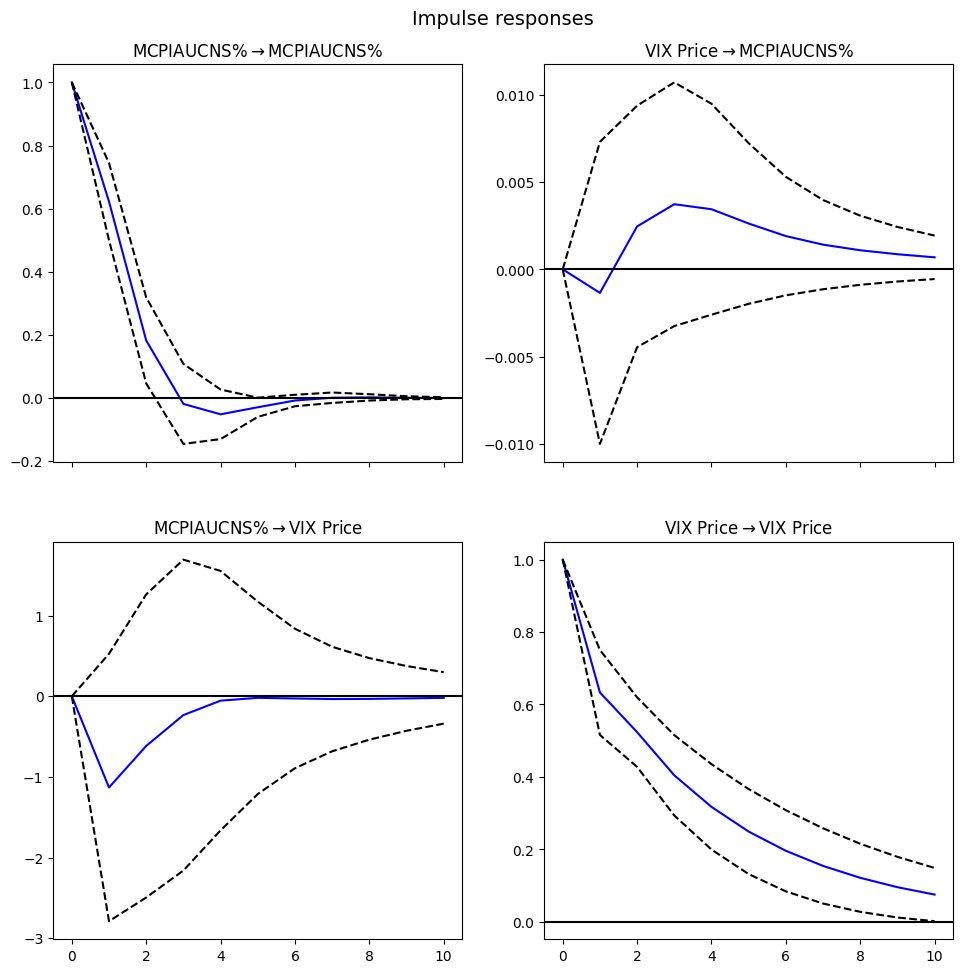

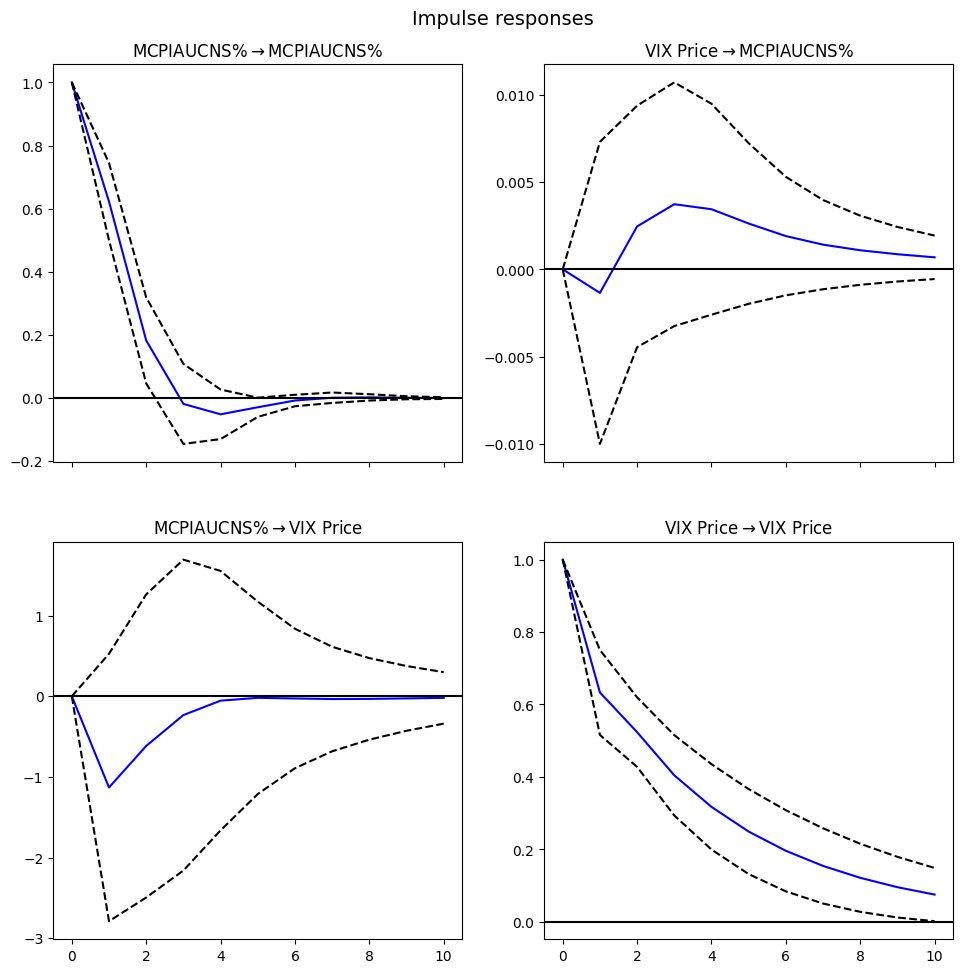

In [112]:
#Impulse response functions (Reduced Form)
irf2 = model2_fit.irf(10)  # Get IRF for 10 periods
irf2.plot()

## **VAR 3 (No Dummy + 1/1/2000 - 6/1/2023 + all endogenous)**

In [ ]:
test_df3 = df[['VIX Price','MCPIAUCNS%','FEDFUNDS%','UnemoloymentRate_first_diff','rgdp_growthrate']]
test3_train, test3_test = test_df3[0:-nobs], test_df3[-nobs:]

In [ ]:
'''Treat everything endogenous'''
model3 = VAR(test3_train)
for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model3.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
x = model3.select_order(maxlags=12)
x.summary()

Lag Order = 1
AIC :  -13.429341095343993
BIC :  -13.040904653778114
FPE :  1.4713817443017562e-06
HQIC:  -13.273556263104613 

Lag Order = 2
AIC :  -14.215847229370052
BIC :  -13.501870700176092
FPE :  6.702299768829034e-07
HQIC:  -13.929470161434129 

Lag Order = 3
AIC :  -14.311997491221698
BIC :  -13.270789811846395
FPE :  6.090487197051967e-07
HQIC:  -13.894320269401195 

Lag Order = 4
AIC :  -14.463747347616739
BIC :  -13.093602682373872
FPE :  5.237216015351798e-07
HQIC:  -13.914055868414616 

Lag Order = 5
AIC :  -14.505689843956883
BIC :  -12.804887404229975
FPE :  5.02877783804391e-07
HQIC:  -13.82326374471618 

Lag Order = 6
AIC :  -14.613531331426707
BIC :  -12.580335193071061
FPE :  4.523669944135549e-07
HQIC:  -13.797643915368033 

Lag Order = 7
AIC :  -14.61452878876841
BIC :  -12.247187706659382
FPE :  4.5318160551639373e-07
HQIC:  -13.664446948895831 

Lag Order = 8
AIC :  -14.523264622763008
BIC :  -11.820011842436168
FPE :  4.983595355729997e-07
HQIC:  -13.43824876461

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-7.236,-7.169,0.0007202,-7.209
1,-13.35,-12.95,1.593e-06,-13.19
2,-14.11,-13.38*,7.435e-07,-13.82*
3,-14.22,-13.16,6.655e-07,-13.80
4,-14.38,-12.98,5.706e-07,-13.82
5,-14.42,-12.69,5.455e-07,-13.73
6,-14.56,-12.49,4.787e-07,-13.73
7,-14.57*,-12.17,4.739e-07*,-13.61
8,-14.48,-11.75,5.195e-07,-13.39
9,-14.47,-11.40,5.310e-07,-13.23


In [ ]:
model3_fitted = model3.fit(2)
model3_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Apr, 2024
Time:                     19:19:29
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -13.5019
Nobs:                     280.000    HQIC:                  -13.9295
Log likelihood:           58.7047    FPE:                6.70230e-07
AIC:                     -14.2158    Det(Omega_mle):     5.52776e-07
--------------------------------------------------------------------
Results for equation VIX Price
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                  4.388690         0.975907            4.497           0.000
L1.VIX Price                           0.723212         0.065046           11.118     

In [ ]:
#Stability Test
if model3_fitted.is_stable():
    print("The model is stable.")
else:
    print("The model is not stable.")

The model is stable.


In [ ]:
#Granger Causality Test
causality_results = model3_fitted.test_causality(caused='VIX Price', causing=['MCPIAUCNS%'], kind='f', signif=0.05)
print(causality_results.summary())
causality_results = model3_fitted.test_causality(caused='MCPIAUCNS%', causing=['VIX Price'], kind='f', signif=0.05)
print(causality_results.summary())

Granger causality F-test. H_0: MCPIAUCNS% does not Granger-cause VIX Price. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
        0.1428          3.002   0.867 (2, 1345)
-----------------------------------------------
Granger causality F-test. H_0: VIX Price does not Granger-cause MCPIAUCNS%. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
        0.3266          3.002   0.721 (2, 1345)
-----------------------------------------------


In [ ]:
lag_order3 = model3_fitted.k_ar
forecast_input3 = test3_train.values[-lag_order3:]

# Forecast
forecast3 = model3_fitted.forecast(y=forecast_input3, steps=len(test3_test))
df_forecast3 = pd.DataFrame(forecast3, index=test3_test.index[:], columns=test3_test.columns)
df_forecast3

test3_test['MCPIAUCNS% forecast'] = df_forecast3['MCPIAUCNS%']
test3_test['VIX Price forecast'] = df_forecast3['VIX Price']
print(test3_test)

            VIX Price  MCPIAUCNS%  FEDFUNDS%  UnemoloymentRate_first_diff  \
Date                                                                        
2023-07-01      13.59    0.190751       5.12                          0.0   
2023-08-01      13.63    0.436715       5.33                          0.1   
2023-09-01      13.57    0.248513       5.33                         -0.3   
2023-10-01      17.52   -0.038338       5.33                          0.0   
2023-11-01      18.14   -0.201514       5.33                         -0.1   
2023-12-01      12.92   -0.099332       5.33                          0.0   
2024-01-01      12.45    0.544750       5.33                          0.6   

            rgdp_growthrate  MCPIAUCNS% forecast  VIX Price forecast  
Date                                                                  
2023-07-01         0.004338             0.330268           17.510340  
2023-08-01         0.003845             0.279765           18.562670  
2023-09-01         0.0

<ipython-input-95-c708bf497f5a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3_test['MCPIAUCNS% forecast'] = df_forecast3['MCPIAUCNS%']
<ipython-input-95-c708bf497f5a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3_test['VIX Price forecast'] = df_forecast3['VIX Price']


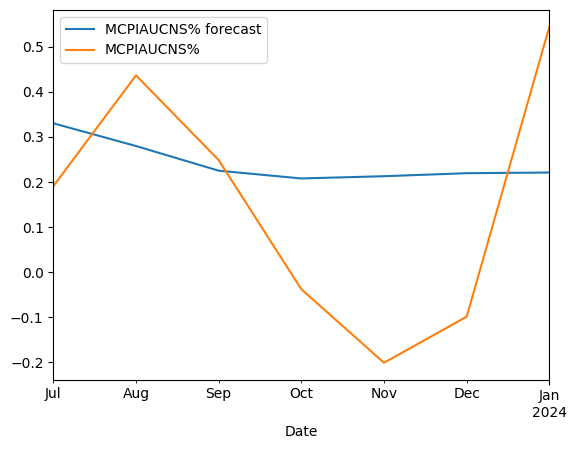

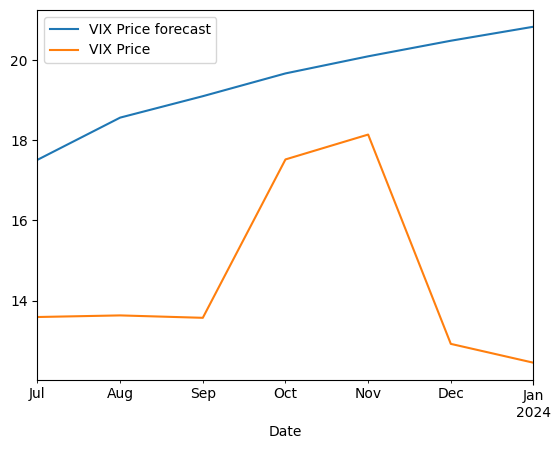

RMSE (inflation): 0.26275569739638466
RMSE (VIX): 5.42525301082554


In [ ]:
test3_test[['MCPIAUCNS% forecast','MCPIAUCNS%']].plot()
pyplot.show()

test3_test[['VIX Price forecast','VIX Price']].plot()
pyplot.show()

mse3_OOS_inflation = mean_squared_error(test3_test['MCPIAUCNS%'], test3_test['MCPIAUCNS% forecast'])
rmse3_OOS_inflation = sqrt(mse3_OOS_inflation)

mse3_OOS__VIX = mean_squared_error(test3_test['VIX Price'], test3_test['VIX Price forecast'])
rmse3_OOS_VIX = sqrt(mse3_OOS__VIX)

print("RMSE (inflation):", rmse3_OOS_inflation)

print("RMSE (VIX):", rmse3_OOS_VIX)

In [ ]:
in_sample_predictions3 = model3_fitted.fittedvalues
test3_train['MCPIAUCNS% forecast'] = in_sample_predictions3['MCPIAUCNS%']
test3_train['VIX Price forecast'] = in_sample_predictions3['VIX Price']
print(test3_train)

            VIX Price  MCPIAUCNS%  FEDFUNDS%  UnemoloymentRate_first_diff  \
Date                                                                        
2000-01-01      24.64    0.297088       5.45                          0.8   
2000-02-01      24.95    0.592417       5.73                         -0.1   
2000-03-01      23.37    0.824499       5.85                         -0.1   
2000-04-01      24.11    0.058411       6.02                         -0.6   
2000-05-01      26.20    0.116754       6.27                          0.1   
...               ...         ...        ...                          ...   
2023-02-01      19.40    0.558211       4.57                          0.0   
2023-03-01      20.70    0.331073       4.65                         -0.3   
2023-04-01      18.70    0.505904       4.83                         -0.5   
2023-05-01      15.78    0.251843       5.06                          0.3   
2023-06-01      17.94    0.322891       5.08                          0.4   

<ipython-input-97-84f475b6b139>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3_train['MCPIAUCNS% forecast'] = in_sample_predictions3['MCPIAUCNS%']
<ipython-input-97-84f475b6b139>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3_train['VIX Price forecast'] = in_sample_predictions3['VIX Price']


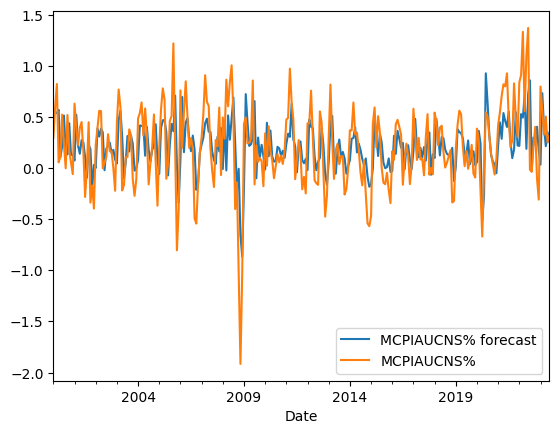

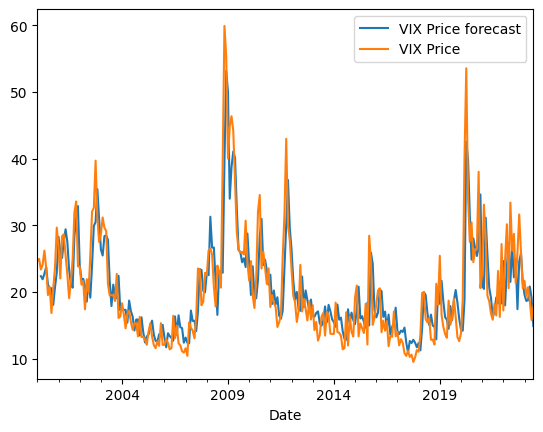

In [ ]:
test3_train[['MCPIAUCNS% forecast','MCPIAUCNS%']].plot()
pyplot.show()
test3_train[['VIX Price forecast','VIX Price']].plot()
pyplot.show()

In [ ]:
test3_train = test3_train.dropna()
mse3_IS_inflation = mean_squared_error(test3_train['MCPIAUCNS%'], test3_train['MCPIAUCNS% forecast'])
rmse3_IS_inflation = sqrt(mse3_IS_inflation)
print("RMSE (inflation):", rmse3_IS_inflation)

mse3_IS_VIX = mean_squared_error(test3_train['VIX Price'], test3_train['VIX Price forecast'])
rmse3_IS_VIX = sqrt(mse3_IS_VIX)
print("RMSE (VIX):", rmse3_IS_VIX)

RMSE (inflation): 0.3186381791721493
RMSE (VIX): 4.6374330904856915


## **VAR 4 (VARMAX + 1/1/2000 - 6/1/2023 + dummy)**

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
test_df4 = df[['VIX Price','MCPIAUCNS%','FEDFUNDS%','UnemoloymentRate_first_diff','rgdp_growthrate']]

recession1_start = '2001-03-01'  # Start date of Event 1
recession1_end = '2001-11-02'    # End date of Event 1

recession2_start = '2007-12-01'  # Start date of Event 1
recession2_end = '2009-06-02'    # End date of Event 1

recession3_start = '2020-02-01'  # Start date of Event 2
recession3_end = '2020-04-02'    # End date of Event 2

test_df4['recession1'] = 0
test_df4.loc[recession1_start:recession1_end, 'recession1'] = 1

test_df4['recession2'] = 0
test_df4.loc[recession2_start:recession2_end, 'recession2'] = 1

test_df4['recession3'] = 0
test_df4.loc[recession3_start:recession3_end, 'recession3'] = 1

test4_train, test4_test = test_df4[0:-nobs], test_df4[-nobs:]
print(test4_train)

            VIX Price  MCPIAUCNS%  FEDFUNDS%  UnemoloymentRate_first_diff  \
Date                                                                        
2000-01-01      24.64    0.297088       5.45                          0.8   
2000-02-01      24.95    0.592417       5.73                         -0.1   
2000-03-01      23.37    0.824499       5.85                         -0.1   
2000-04-01      24.11    0.058411       6.02                         -0.6   
2000-05-01      26.20    0.116754       6.27                          0.1   
...               ...         ...        ...                          ...   
2023-02-01      19.40    0.558211       4.57                          0.0   
2023-03-01      20.70    0.331073       4.65                         -0.3   
2023-04-01      18.70    0.505904       4.83                         -0.5   
2023-05-01      15.78    0.251843       5.06                          0.3   
2023-06-01      17.94    0.322891       5.08                          0.4   

<ipython-input-73-29691aa008f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df4['recession1'] = 0
<ipython-input-73-29691aa008f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df4['recession2'] = 0
<ipython-input-73-29691aa008f1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

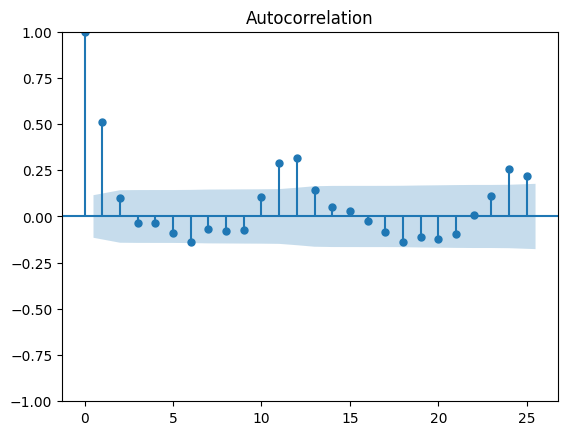

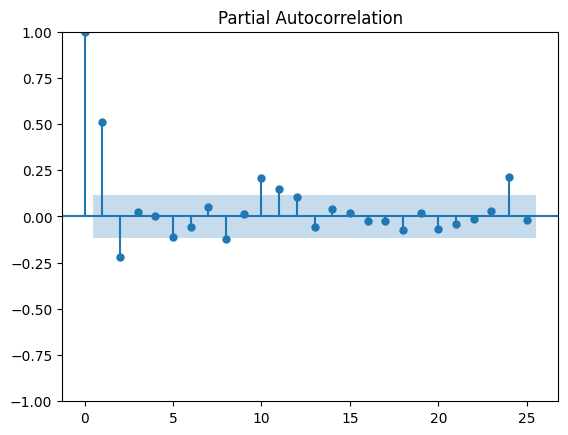

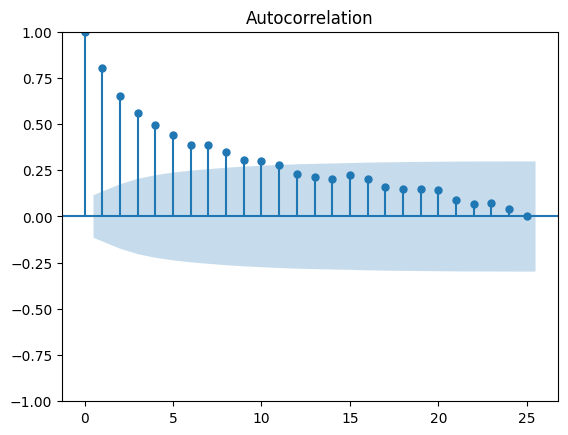

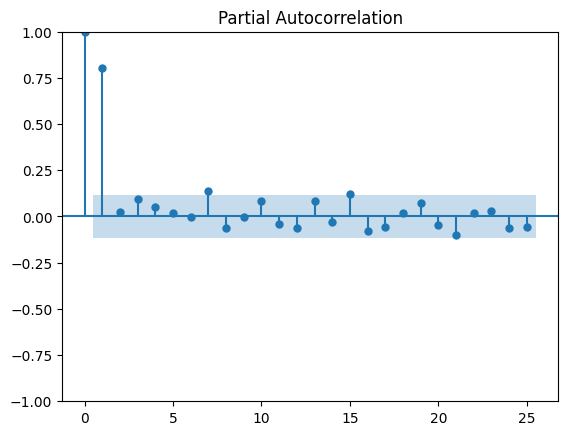

In [ ]:
plot_acf(test_df4['MCPIAUCNS%'])
pyplot.show()
plot_pacf(test_df4['MCPIAUCNS%'])
pyplot.show()
plot_acf(test_df4['VIX Price'])
pyplot.show()
plot_pacf(test_df4['VIX Price'])
pyplot.show()
#MCPI = MA(1),MA(2)
#VIX = AR(1), AR(2)

In [ ]:
endog4 = test4_train[['VIX Price','MCPIAUCNS%']]
exog4 = test4_train[['FEDFUNDS%','UnemoloymentRate_first_diff','rgdp_growthrate','recession1','recession2','recession3']]
model4 = VARMAX(endog=endog4,exog=exog4,order=(0,2),trend='ct')
model4_fitted = model4.fit(disp=False)
model4_fitted.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Dep. Variable:,"['VIX Price', 'MCPIAUCNS%']",No. Observations:,282
Model:,VMAX(2),Log Likelihood,-941.969
,+ intercept,AIC,1937.938
Date:,"Mon, 15 Apr 2024",BIC,2036.270
Time:,19:23:28,HQIC,1977.370
Sample:,01-01-2000,,
,- 06-01-2023,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"18.92, 7.99",Jarque-Bera (JB):,"64.40, 13.70"
Prob(Q):,"0.00, 0.00",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"1.88, 1.06",Skew:,"0.99, 0.11"


<ipython-input-76-a84b273d81f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4_train['VIX Price forecast']=in_sample_prediction4['VIX Price'].values
<ipython-input-76-a84b273d81f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4_train['MCPIAUCNS% forecast'] = in_sample_prediction4['MCPIAUCNS%'].values


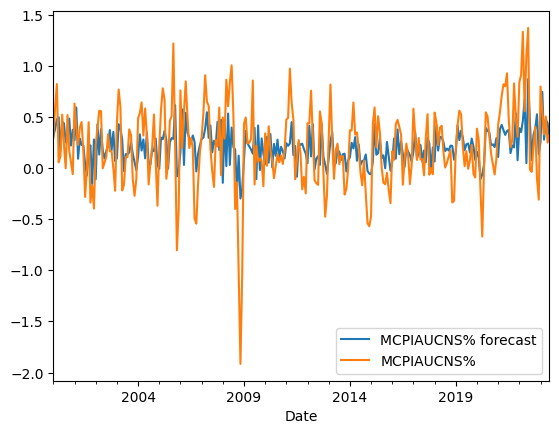

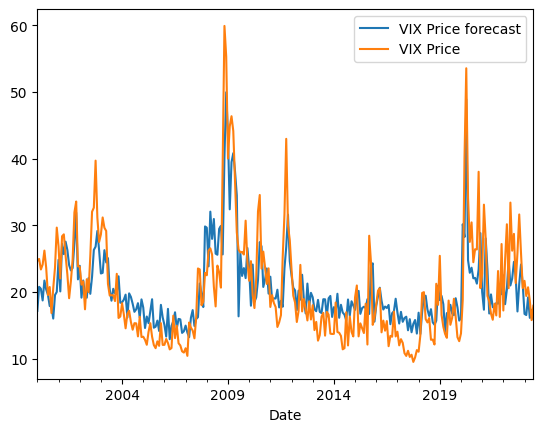

RMSE (inflation): 0.3390747450292326
RMSE (VIX): 4.955390975268246


In [ ]:
in_sample_prediction4 = model4_fitted.predict()
in_sample_prediction4
test4_train['VIX Price forecast']=in_sample_prediction4['VIX Price'].values
test4_train['MCPIAUCNS% forecast'] = in_sample_prediction4['MCPIAUCNS%'].values

test4_train[['MCPIAUCNS% forecast','MCPIAUCNS%']].plot()
pyplot.show()
test4_train[['VIX Price forecast','VIX Price']].plot()
pyplot.show()

test4_train = test4_train.dropna()
mse4_IS_inflation = mean_squared_error(test4_train['MCPIAUCNS%'], test4_train['MCPIAUCNS% forecast'])
rmse4_IS_inflation = sqrt(mse4_IS_inflation)
print("RMSE (inflation):", rmse4_IS_inflation)

mse4_IS_VIX = mean_squared_error(test4_train['VIX Price'], test4_train['VIX Price forecast'])
rmse4_IS_VIX = sqrt(mse4_IS_VIX)
print("RMSE (VIX):", rmse4_IS_VIX)

<ipython-input-77-136a6ad02f05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4_test['VIX Price forecast']=out_of_sample_prediction4['VIX Price'].values
<ipython-input-77-136a6ad02f05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4_test['MCPIAUCNS% forecast']=out_of_sample_prediction4['MCPIAUCNS%'].values


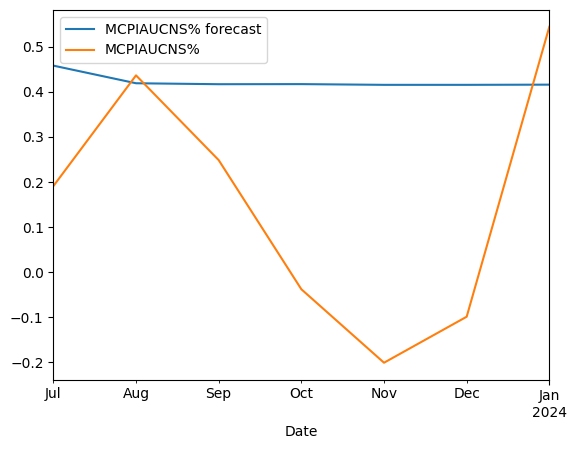

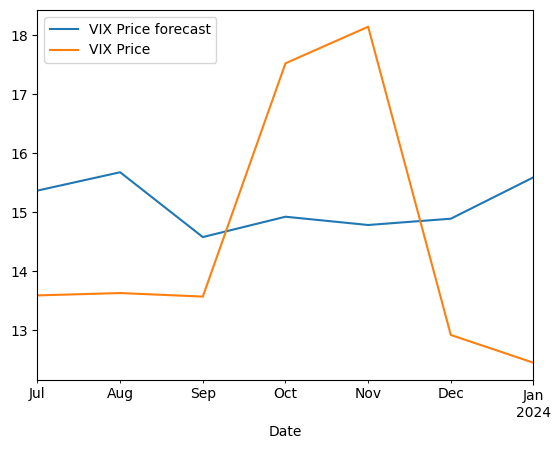

RMSE (inflation): 0.3723690305602091
RMSE (VIX): 2.393663878163728


In [ ]:
out_of_sample_prediction4 = model4_fitted.forecast(7,exog=test4_test[['FEDFUNDS%','UnemoloymentRate_first_diff','rgdp_growthrate','recession1','recession2','recession3']])
test4_test['VIX Price forecast']=out_of_sample_prediction4['VIX Price'].values
test4_test['MCPIAUCNS% forecast']=out_of_sample_prediction4['MCPIAUCNS%'].values

test4_test[['MCPIAUCNS% forecast','MCPIAUCNS%']].plot()
pyplot.show()

test4_test[['VIX Price forecast','VIX Price']].plot()
pyplot.show()

mse4_OOS_inflation = mean_squared_error(test4_test['MCPIAUCNS%'], test4_test['MCPIAUCNS% forecast'])
rmse4_OOS_inflation = sqrt(mse4_OOS_inflation)

mse4_OOS__VIX = mean_squared_error(test4_test['VIX Price'], test4_test['VIX Price forecast'])
rmse4_OOS_VIX = sqrt(mse4_OOS__VIX)

print("RMSE (inflation):", rmse4_OOS_inflation)
print("RMSE (VIX):", rmse4_OOS_VIX)

In [ ]:
model4_fitted.impulse_responses(steps=10)

,VIX Price,MCPIAUCNS%
0,1.000000,0.000000
1,0.512656,0.011350
2,0.306206,0.003764
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000
